## Keras -- MLPs on MNIST Dataset

In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


### Function for plotting Dynamic plots

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

### Train - Test Split

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Shape of train and test data

In [4]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) 

In [6]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


### Sample point before normalization

In [7]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

## Normalizing the values

In [0]:
x_train = x_train/255
x_test = x_test/255

### Sample point after normalization

In [9]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
print("Class label of first image :", y_train[0])

Class label of first image : 5


## Converting it to a categorical variable

In [11]:
# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

### Model Parameters

In [0]:
output_dim = 10
input_dim = x_train.shape[1]

batch_size = 128 
nb_epoch = 20

### Softmax Classifier

In [0]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [15]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 1.3000 - acc: 0.6889 - val_loss: 0.8128 - val_acc: 0.8318
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.7189 - acc: 0.8387 - val_loss: 0.6081 - val_acc: 0.8617
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.5886 - acc: 0.8588 - val_loss: 0.5266 - val_acc: 0.8726
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.5265 - acc: 0.8692 - val_loss: 0.4807 - val_acc: 0.8801
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.4888 - acc: 0.8761 - val_loss: 0.4508 - val_acc: 0.8853
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.4628 - acc: 0.8803 - val_loss: 0.4294 - val_acc: 0.8897
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.4436 - acc: 0.8837 - val_loss: 0.4130 - val_acc

In [16]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.3356119744837284
Test accuracy: 0.9084


<IPython.core.display.Javascript object>

## MLP + Sigmoid activation + SGDOptimizer

In [0]:
from keras.initializers import glorot_uniform
from keras.initializers import he_uniform

In [18]:

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid',kernel_initializer = glorot_uniform(seed=None), input_shape=(input_dim,)))a
model_sigmoid.add(Dense(128, activation='sigmoid',kernel_initializer = glorot_uniform(seed=None)))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 2.2654 - acc: 0.2394 - val_loss: 2.2166 - val_acc: 0.3688
Epoch 2/20
60000/60000 [==============================] - 2s 41us/step - loss: 2.1676 - acc: 0.4745 - val_loss: 2.1075 - val_acc: 0.5514
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 2.0410 - acc: 0.5880 - val_loss: 1.9556 - val_acc: 0.6358
Epoch 4/20
60000/60000 [==============================] - 2s 40us/step - loss: 1.8626 - acc: 0.6257 - val_loss: 1.7458 - val_acc: 0.6615
Epoch 5/20
60000/60000 [==============================] - 2s 41us/step - loss: 1.6359 - acc: 0.6622 - val_loss: 1.5046 - val_acc: 0.6754
Epoch 6/20
60000/60000 [==============================] - 2s 42us/step - loss: 1.4004 - acc: 0.6961 - val_loss: 1.2788 - val_acc: 0.7223
Epoch 7/20
60000/60000 [==============================] - 3s 42us/step - loss: 1.1984 - acc: 0.7331 - val_loss: 1.1005 - val_acc

In [20]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.45797909843921664
Test accuracy: 0.8786


<IPython.core.display.Javascript object>

In [21]:
model_sigmoid.get_weights()[4].shape

(128, 10)

In [0]:
# !pip install seaborn --upgrade

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


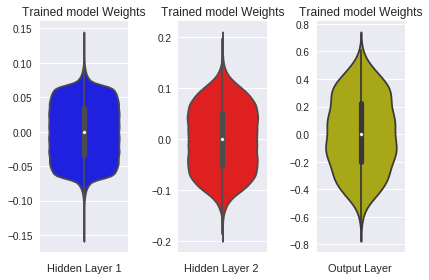

In [23]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + Sigmoid activation + ADAM

In [24]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,),kernel_initializer = glorot_uniform(seed=None)))
model_sigmoid.add(Dense(128, activation='sigmoid',kernel_initializer = glorot_uniform(seed=None)))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.5602 - acc: 0.8526 - val_loss: 0.2554 - val_acc: 0.9263
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2253 - acc: 0.9336 - val_loss: 0.1879 - val_acc: 0.9429
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - los

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.0713817038344845
Test accuracy: 0.9807


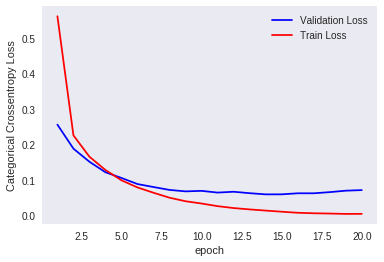

In [25]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


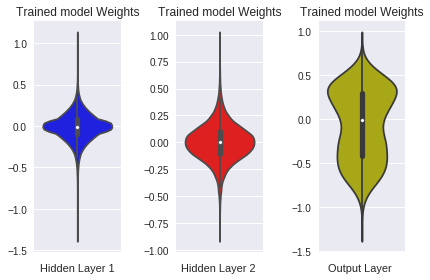

In [26]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + ReLU +SGD

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_uniform(seed=42)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=he_uniform(seed=42)))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.9651 - acc: 0.7711 - val_loss: 0.4741 - val_acc: 0.8835
Epoch 2/20
60000/60000 [==============================] - 2s 42us/step - loss: 0.4222 - acc: 0.8881 - val_loss: 0.3479 - val_acc: 0.9059
Epoch 3/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.3428 - acc: 0.9056 - val_loss: 0.3022 - val_acc: 0.9160
Epoch 4/20
60000/60000 [==============================] - 2s 41us/step - loss: 0.3044 - acc: 0.9151 - val_loss: 0.2753 - val_acc: 0.9232
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2789 - acc: 0.9223 - val_loss: 0.2544 - val_acc: 0.9283
Epoch 6/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2594 - acc: 0.9277 - val_loss: 0.2417 - val_acc: 0.9322
Epoch 7/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2438 - acc: 0.9320 - val_loss: 0.2273 - val_acc

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.14403678345754742
Test accuracy: 0.9584


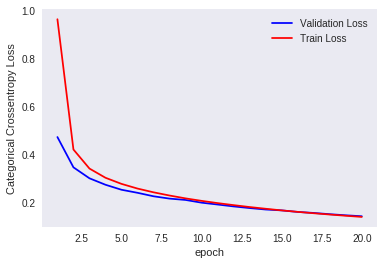

In [29]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


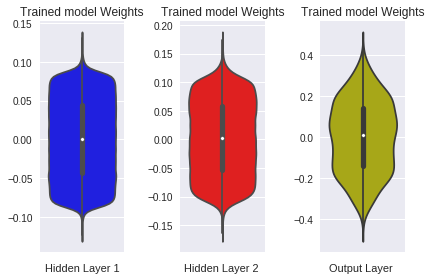

In [30]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + ReLU + ADAM

In [31]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_uniform(seed=42)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=he_uniform(seed=42)))
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2372 - acc: 0.9305 - val_loss: 0.1097 - val_acc: 0.9666
Epoch 2/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.0868 - acc: 0.9739 - val_loss: 0.0832 - val_acc: 0.9727
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step 

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.08330219767008548
Test accuracy: 0.9835


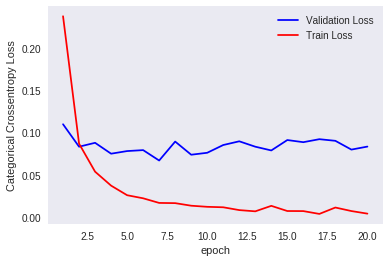

In [32]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


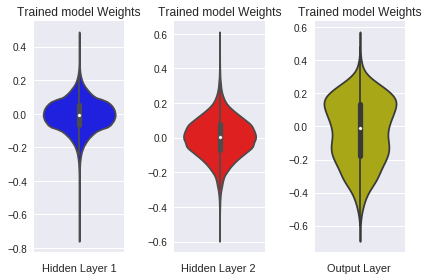

In [33]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [34]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=glorot_uniform(seed=42)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [35]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.2713 - acc: 0.9215 - val_loss: 0.1684 - val_acc: 0.9503
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1418 - acc: 0.9592 - val_loss: 0.1233 - val_acc: 0.9648
Epoch 3/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.1015 - acc: 0.9711 - val_loss: 0.1095 - val_acc: 0.9670
Epoch 4/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0764 - acc: 0.9782 - val_loss: 0.0932 - val_acc: 0.9704
Epoch 5/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.0597 - acc: 0.9825 - val_loss: 0.0895 - val_acc: 0.9716
Epoch 6/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.0474 - acc: 0.9859 - val_loss: 0.0895 - val_acc: 0.9715
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0383 - acc: 0.9881 - val_loss: 0.0869 - val_ac

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.0881539996974774
Test accuracy: 0.9787


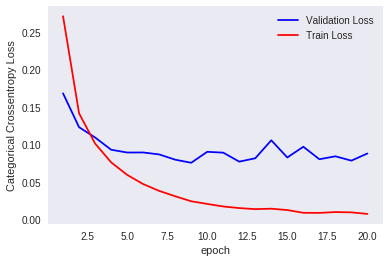

In [36]:
score = model_batch.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


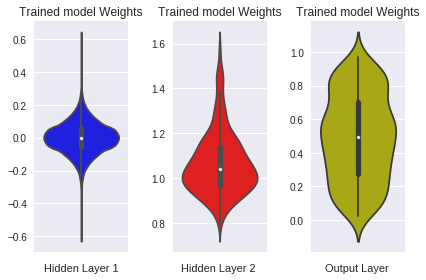

In [37]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + Dropout + AdamOptimizer


In [38]:
from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=glorot_uniform(seed=42)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=glorot_uniform(seed=42)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total para

In [39]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.4795 - acc: 0.8569 - val_loss: 0.2515 - val_acc: 0.9260
Epoch 2/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.3284 - acc: 0.9020 - val_loss: 0.2124 - val_acc: 0.9376
Epoch 3/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2855 - acc: 0.9150 - val_loss: 0.1971 - val_acc: 0.9393
Epoch 4/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.2628 - acc: 0.9215 - val_loss: 0.1692 - val_acc: 0.9489
Epoch 5/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2375 - acc: 0.9293 - val_loss: 0.1486 - val_acc: 0.9546
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2182 - acc: 0.9338 - val_loss: 0.1343 - val_acc: 0.9607
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.1962 - acc: 0.9411 - val_loss: 0.1225 - val_ac

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.06364470130084082
Test accuracy: 0.9818


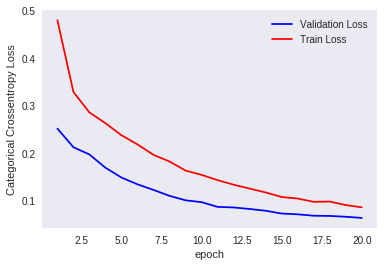

In [40]:
score = model_drop.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


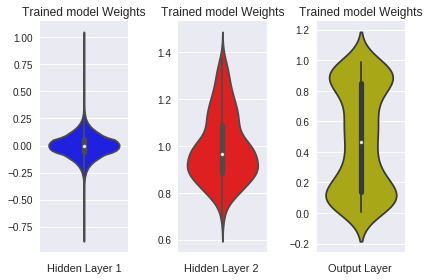

In [41]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## Hyper-parameter tuning of Keras models using Sklearn

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    weights = glorot_uniform(seed=42) if activ =='sigmoid' else he_uniform(seed=42)
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=weights))
    model.add(Dense(128, activation=activ, kernel_initializer=weights) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [49]:
activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [50]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976367 using {'activ': 'relu'}
0.975617 (0.001115) with: {'activ': 'sigmoid'}
0.976367 (0.001837) with: {'activ': 'relu'}


## Other MLP Architectures

### Model parameters

In [0]:
output_dim = 10
input_dim = x_train.shape[1]

batch_size = 256 
nb_epoch = 30

## 512 (Input Layer) -> 256 (Hidden Layer 1) -> 128 (Hidden Layer 2)->10 (Output Layer)

## MLP + Relu + Adam

In [29]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer = he_uniform(seed=42)))
model_relu.add(Dense(256, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(Dense(128, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 49us/step - loss: 0.2733 - acc: 0.9193 - val_loss: 0.1223 - val_acc: 0.9615
Epoch 2/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0918 - acc: 0.9720 - val_loss: 0.0865 - val_acc: 0.9722
Epoch 3/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0584 - acc: 0.9822 - val_loss: 0.0814 - val_acc: 0.9745
Epoch 4/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0379 - acc: 0.9884 - val_loss: 0.0706 - val_acc: 0.9780
Epoch 5/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0271 - acc: 0.9913 - val_loss: 0.0668 - val_acc: 0.9797
Epoch 6/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0234 - acc: 0.9920 - val_loss: 0.0635 - val_acc: 0.9808
Epoch 7/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0182 - acc: 0.9940 - val_loss: 0.0713 - val_acc

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.09108170526833877
Test accuracy: 0.9844


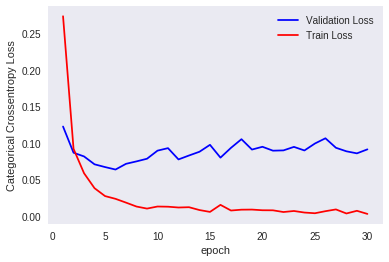

In [31]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


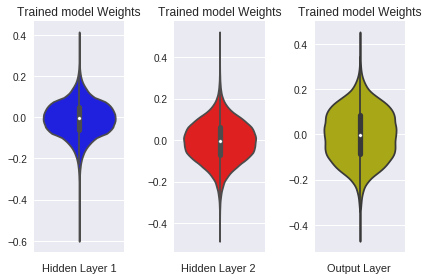

In [32]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + Relu + AdaDelta

In [33]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer = he_uniform(seed=42)))
model_relu.add(Dense(256, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(Dense(128, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [34]:
model_relu.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 55us/step - loss: 0.3349 - acc: 0.8981 - val_loss: 0.1960 - val_acc: 0.9378
Epoch 2/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.1205 - acc: 0.9641 - val_loss: 0.1012 - val_acc: 0.9686
Epoch 3/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.0786 - acc: 0.9758 - val_loss: 0.0814 - val_acc: 0.9736
Epoch 4/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.0544 - acc: 0.9834 - val_loss: 0.0875 - val_acc: 0.9725
Epoch 5/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.0388 - acc: 0.9879 - val_loss: 0.0761 - val_acc: 0.9753
Epoch 6/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.0262 - acc: 0.9921 - val_loss: 0.0611 - val_acc: 0.9804
Epoch 7/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.0193 - acc: 0.9943 - val_loss: 0.0632 - val_acc

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.07672794579545648
Test accuracy: 0.9828


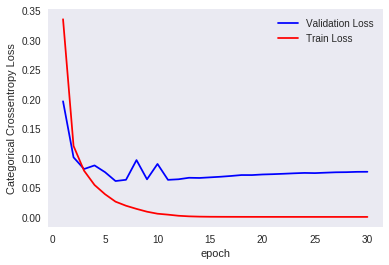

In [35]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


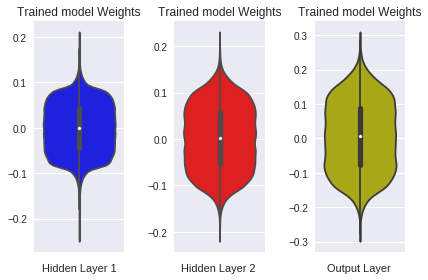

In [36]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + Relu + Adam + Batch Normalization

In [37]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total para

In [38]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 96us/step - loss: 0.2130 - acc: 0.9367 - val_loss: 0.0976 - val_acc: 0.9709
Epoch 2/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0664 - acc: 0.9802 - val_loss: 0.0861 - val_acc: 0.9731
Epoch 3/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0375 - acc: 0.9887 - val_loss: 0.0818 - val_acc: 0.9759
Epoch 4/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.0244 - acc: 0.9922 - val_loss: 0.0842 - val_acc: 0.9749
Epoch 5/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.0196 - acc: 0.9938 - val_loss: 0.0748 - val_acc: 0.9780
Epoch 6/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0181 - acc: 0.9942 - val_loss: 0.0792 - val_acc: 0.9771
Epoch 7/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0111 - acc: 0.9966 - val_loss: 0.0783 - val_acc

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.08716667593519478
Test accuracy: 0.98


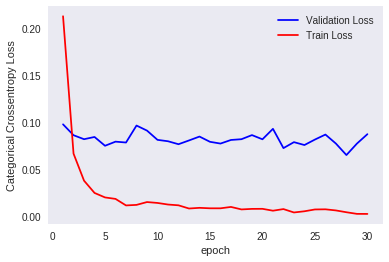

In [39]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


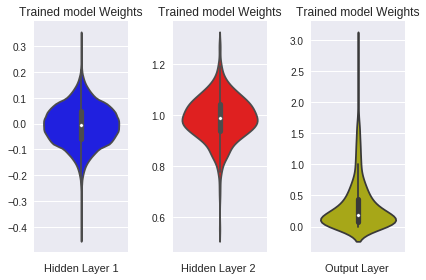

In [40]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + Sigmoid + Adadelta + Batch Normalization

In [61]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,),kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dense(256, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dense(128, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
dense_52 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
dense_53 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512       
_________________________________________________________________
dense_54 (Dense)             (None, 10)                1290      
Total para

In [62]:
model_sigmoid.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.2950 - acc: 0.9133 - val_loss: 0.2651 - val_acc: 0.9148
Epoch 2/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.1512 - acc: 0.9562 - val_loss: 0.1579 - val_acc: 0.9476
Epoch 3/30
60000/60000 [==============================] - 4s 74us/step - loss: 0.1001 - acc: 0.9710 - val_loss: 0.1222 - val_acc: 0.9614
Epoch 4/30
60000/60000 [==============================] - 4s 74us/step - loss: 0.0708 - acc: 0.9796 - val_loss: 0.1408 - val_acc: 0.9539
Epoch 5/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.0513 - acc: 0.9847 - val_loss: 0.0923 - val_acc: 0.9721
Epoch 6/30
60000/60000 [==============================] - 4s 74us/step - loss: 0.0372 - acc: 0.9885 - val_loss: 0.1203 - val_acc: 0.9645
Epoch 7/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.0299 - acc: 0.9905 - val_loss: 0.0915 - val_ac

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.08201586632472523
Test accuracy: 0.9812


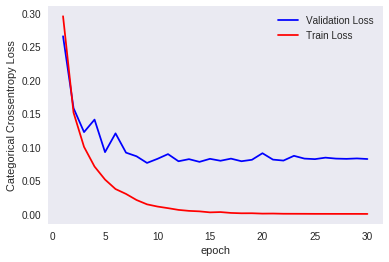

In [63]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


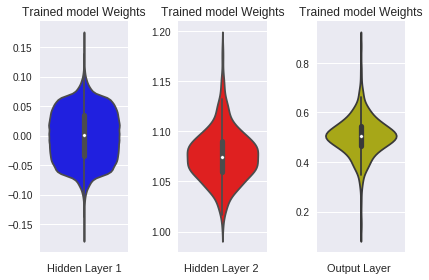

In [64]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + Relu + Adam + Batch Normalization + Dropout

In [45]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_15 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               32896     
__________

In [46]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 112us/step - loss: 0.6581 - acc: 0.7989 - val_loss: 0.1837 - val_acc: 0.9437
Epoch 2/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2718 - acc: 0.9192 - val_loss: 0.1409 - val_acc: 0.9573
Epoch 3/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2050 - acc: 0.9393 - val_loss: 0.1099 - val_acc: 0.9671
Epoch 4/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.1672 - acc: 0.9505 - val_loss: 0.0982 - val_acc: 0.9700
Epoch 5/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.1438 - acc: 0.9571 - val_loss: 0.0944 - val_acc: 0.9734
Epoch 6/30
60000/60000 [==============================] - 4s 73us/step - loss: 0.1310 - acc: 0.9606 - val_loss: 0.0882 - val_acc: 0.9749
Epoch 7/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.1160 - acc: 0.9654 - val_loss: 0.0827 - val_ac

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.05832962003170833
Test accuracy: 0.984


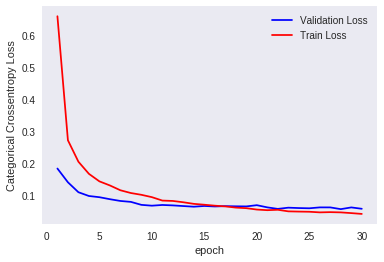

In [47]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


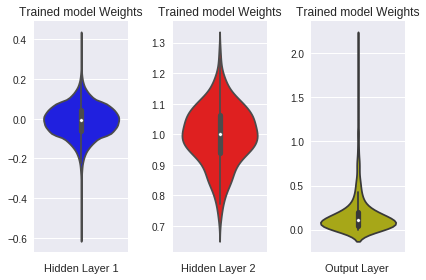

In [48]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## MLP + Tanh + Adam + Batch Normalization + Dropout

In [49]:
model_tanh = Sequential()
model_tanh.add(Dense(512, activation='tanh', input_shape=(input_dim,),kernel_initializer = RandomNormal(seed=42)))
model_tanh.add(BatchNormalization())
model_tanh.add(Dropout(0.5))
model_tanh.add(Dense(256, activation='tanh',kernel_initializer = RandomNormal(seed=42)))
model_tanh.add(BatchNormalization())
model_tanh.add(Dropout(0.5))
model_tanh.add(Dense(128, activation='tanh',kernel_initializer = RandomNormal(seed=42)))
model_tanh.add(BatchNormalization())
model_tanh.add(Dropout(0.5))
model_tanh.add(Dense(output_dim, activation='softmax'))

model_tanh.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               32896     
__________

In [50]:
model_tanh.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_tanh.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 112us/step - loss: 0.6363 - acc: 0.8087 - val_loss: 0.2592 - val_acc: 0.9280
Epoch 2/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.3524 - acc: 0.8952 - val_loss: 0.2062 - val_acc: 0.9418
Epoch 3/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2798 - acc: 0.9179 - val_loss: 0.1637 - val_acc: 0.9512
Epoch 4/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2378 - acc: 0.9300 - val_loss: 0.1414 - val_acc: 0.9588
Epoch 5/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2003 - acc: 0.9411 - val_loss: 0.1222 - val_acc: 0.9648
Epoch 6/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.1777 - acc: 0.9474 - val_loss: 0.1120 - val_acc: 0.9675
Epoch 7/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.1629 - acc: 0.9521 - val_loss: 0.0989 - val_ac

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.06410030028896872
Test accuracy: 0.9822


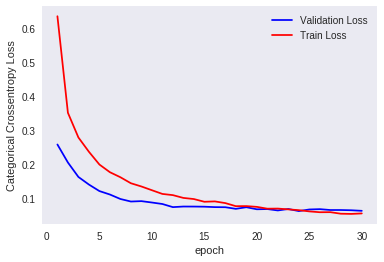

In [51]:
score = model_tanh.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


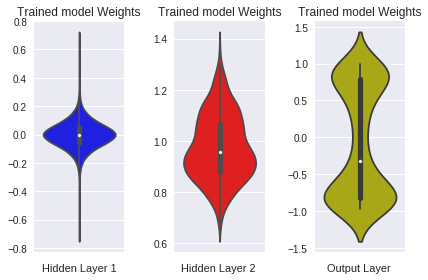

In [52]:
w_after = model_tanh.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## 512 (Input Layer) -> 384 (Hidden Layer 1) -> 256 (Hidden Layer 2) -> 128 (Hidden Layer 3) -> 10 (Output)

### MLP + Relu + Adam + Batch Normalization

In [53]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(384, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dense_42 (Dense)             (None, 384)               196992    
_________________________________________________________________
batch_normalization_22 (Batc (None, 384)               1536      
_________________________________________________________________
dense_43 (Dense)             (None, 256)               98560     
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
dense_44 (Dense)             (None, 128)               32896     
__________

In [54]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 131us/step - loss: 0.2022 - acc: 0.9393 - val_loss: 0.1086 - val_acc: 0.9678
Epoch 2/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.0610 - acc: 0.9815 - val_loss: 0.0888 - val_acc: 0.9725
Epoch 3/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.0380 - acc: 0.9879 - val_loss: 0.0900 - val_acc: 0.9751
Epoch 4/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.0284 - acc: 0.9911 - val_loss: 0.0916 - val_acc: 0.9718
Epoch 5/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.0247 - acc: 0.9919 - val_loss: 0.0896 - val_acc: 0.9749
Epoch 6/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0233 - acc: 0.9917 - val_loss: 0.0816 - val_acc: 0.9770
Epoch 7/30
60000/60000 [==============================] - 5s 81us/step - loss: 0.0194 - acc: 0.9933 - val_loss: 0.0861 - val_ac

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.0846524962363992
Test accuracy: 0.9804


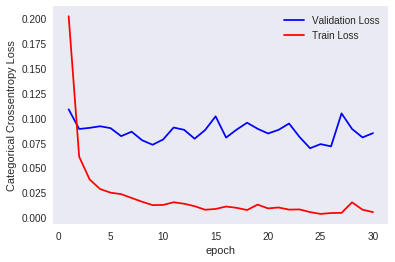

In [55]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


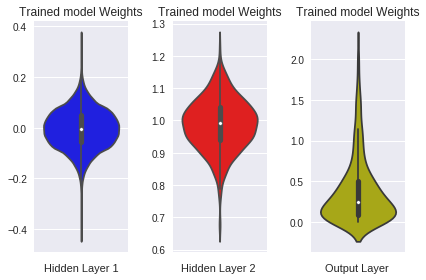

In [56]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

### MLP + Relu + Adam + Batch Normalization + Dropout

In [21]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(384, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 384)               196992    
_________________________________________________________________
batch_normalization_6 (Batch (None, 384)               1536      
_________________________________________________________________
dropout_2 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               98560     
__________

In [22]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 111us/step - loss: 0.8439 - acc: 0.7394 - val_loss: 0.2126 - val_acc: 0.9380
Epoch 2/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.3113 - acc: 0.9110 - val_loss: 0.1491 - val_acc: 0.9552
Epoch 3/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.2322 - acc: 0.9334 - val_loss: 0.1258 - val_acc: 0.9632
Epoch 4/30
60000/60000 [==============================] - 5s 83us/step - loss: 0.1879 - acc: 0.9454 - val_loss: 0.1073 - val_acc: 0.9700
Epoch 5/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.1616 - acc: 0.9537 - val_loss: 0.1013 - val_acc: 0.9714
Epoch 6/30
60000/60000 [==============================] - 5s 83us/step - loss: 0.1447 - acc: 0.9580 - val_loss: 0.0883 - val_acc: 0.9735
Epoch 7/30
60000/60000 [==============================] - 5s 82us/step - loss: 0.1280 - acc: 0.9634 - val_loss: 0.0880 - val_ac

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.05917284134379588
Test accuracy: 0.9851


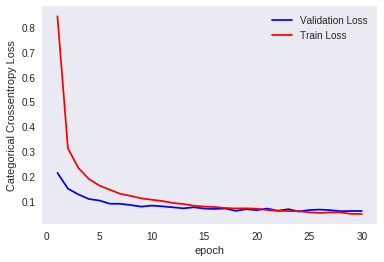

In [23]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


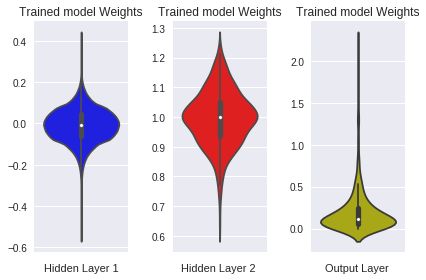

In [24]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

### MLP + Sigmoid + Adam + Dropout

In [57]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,),kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(384, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(256, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(128, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 384)               196992    
_________________________________________________________________
dropout_16 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               98560     
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
__________

In [58]:
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 88us/step - loss: 1.6711 - acc: 0.3800 - val_loss: 0.6325 - val_acc: 0.8257
Epoch 2/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.5957 - acc: 0.8287 - val_loss: 0.3383 - val_acc: 0.9053
Epoch 3/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.3981 - acc: 0.8943 - val_loss: 0.2429 - val_acc: 0.9317
Epoch 4/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.3151 - acc: 0.9174 - val_loss: 0.1969 - val_acc: 0.9445
Epoch 5/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.2637 - acc: 0.9293 - val_loss: 0.1708 - val_acc: 0.9499
Epoch 6/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.2324 - acc: 0.9384 - val_loss: 0.1553 - val_acc: 0.9552
Epoch 7/30
60000/60000 [==============================] - 3s 50us/step - loss: 0.2116 - acc: 0.9438 - val_loss: 0.1397 - val_acc

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.07273450266823638
Test accuracy: 0.9819


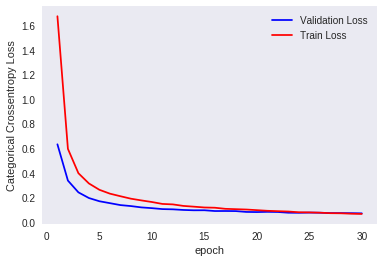

In [59]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


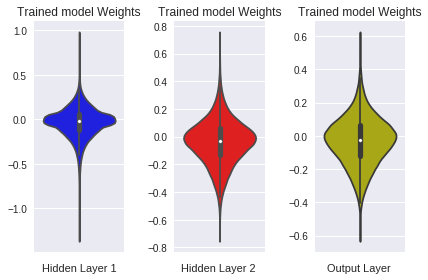

In [60]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

### MLP + Sigmoid + Adam + Batch Normalization + Dropout

In [65]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,),kernel_initializer = glorot_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(384, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(256, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(128, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 384)               196992    
_________________________________________________________________
dropout_20 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 256)               98560     
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               32896     
__________

In [66]:
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 93us/step - loss: 1.5981 - acc: 0.4247 - val_loss: 0.6162 - val_acc: 0.8066
Epoch 2/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.5689 - acc: 0.8375 - val_loss: 0.3133 - val_acc: 0.9139
Epoch 3/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.3897 - acc: 0.8958 - val_loss: 0.2439 - val_acc: 0.9311
Epoch 4/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.3098 - acc: 0.9179 - val_loss: 0.1967 - val_acc: 0.9438
Epoch 5/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.2660 - acc: 0.9292 - val_loss: 0.1718 - val_acc: 0.9516
Epoch 6/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.2340 - acc: 0.9379 - val_loss: 0.1565 - val_acc: 0.9554
Epoch 7/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.2086 - acc: 0.9448 - val_loss: 0.1373 - val_acc

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.07282354564194102
Test accuracy: 0.9799


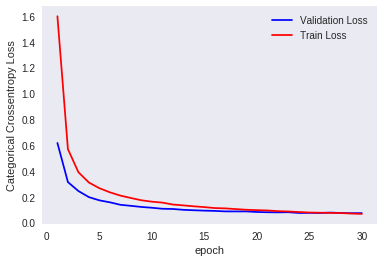

In [67]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


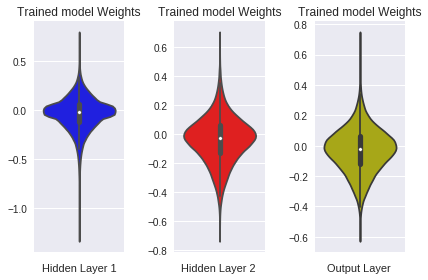

In [68]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## 512 (Input Layer) -> 384 (Hidden Layer 1) -> 256 (Hidden Layer 2) -> 128 (Hidden Layer 3) -> 64 (Hidden Layer 4) -> 10 (Output)

### MLP + Relu + Adam + Batch Normalization

In [69]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(384, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(256, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(64, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_32 (Batc (None, 512)               2048      
_________________________________________________________________
dense_61 (Dense)             (None, 384)               196992    
_________________________________________________________________
batch_normalization_33 (Batc (None, 384)               1536      
_________________________________________________________________
dense_62 (Dense)             (None, 256)               98560     
_________________________________________________________________
batch_normalization_34 (Batc (None, 256)               1024      
_________________________________________________________________
dense_63 (Dense)             (None, 128)               32896     
__________

In [70]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 161us/step - loss: 0.2330 - acc: 0.9321 - val_loss: 0.1023 - val_acc: 0.9668
Epoch 2/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.0708 - acc: 0.9791 - val_loss: 0.0833 - val_acc: 0.9737
Epoch 3/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.0443 - acc: 0.9864 - val_loss: 0.0954 - val_acc: 0.9719
Epoch 4/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.0357 - acc: 0.9879 - val_loss: 0.0726 - val_acc: 0.9788
Epoch 5/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.0236 - acc: 0.9926 - val_loss: 0.1047 - val_acc: 0.9695
Epoch 6/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.0235 - acc: 0.9924 - val_loss: 0.0955 - val_acc: 0.9742
Epoch 7/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.0212 - acc: 0.9930 - val_loss: 0.0879 - val_a

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.08277414950197162
Test accuracy: 0.9813


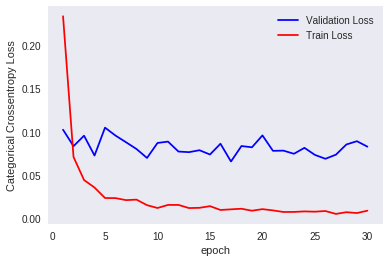

In [71]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


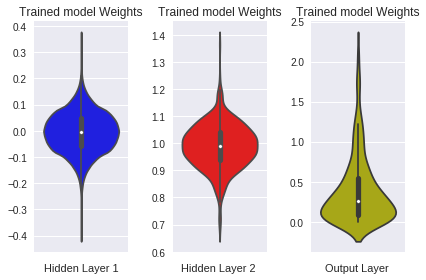

In [72]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

### MLP + Relu + Batch Normalization + Dropout

In [73]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(384, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(256, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(128, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(64, activation='relu',kernel_initializer = he_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_37 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 384)               196992    
_________________________________________________________________
batch_normalization_38 (Batc (None, 384)               1536      
_________________________________________________________________
dropout_24 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)               98560     
__________

In [74]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 179us/step - loss: 1.3166 - acc: 0.5782 - val_loss: 0.3006 - val_acc: 0.9147
Epoch 2/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.4651 - acc: 0.8670 - val_loss: 0.2038 - val_acc: 0.9436
Epoch 3/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.3246 - acc: 0.9130 - val_loss: 0.1516 - val_acc: 0.9593
Epoch 4/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.2599 - acc: 0.9318 - val_loss: 0.1397 - val_acc: 0.9619
Epoch 5/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.2176 - acc: 0.9429 - val_loss: 0.1294 - val_acc: 0.9668
Epoch 6/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.1926 - acc: 0.9494 - val_loss: 0.1085 - val_acc: 0.9725
Epoch 7/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.1734 - acc: 0.9554 - val_loss: 0.1104 -

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.06912337946948828
Test accuracy: 0.9838


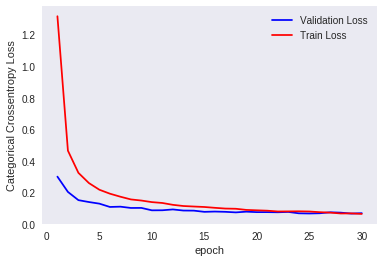

In [75]:
score = model_relu.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots showimg the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


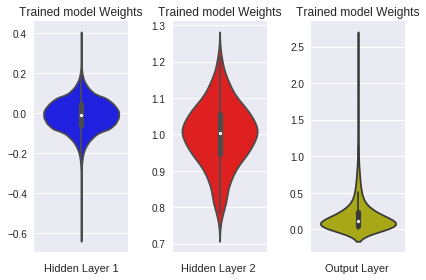

In [76]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

### MLP + Sigmoid + Adam +Dropout

In [77]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,),kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(384, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(256, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(128, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(64, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_28 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 384)               196992    
_________________________________________________________________
dropout_29 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 256)               98560     
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 128)               32896     
__________

In [78]:
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 111us/step - loss: 2.1557 - acc: 0.1896 - val_loss: 1.3210 - val_acc: 0.5750
Epoch 2/30
60000/60000 [==============================] - 3s 53us/step - loss: 1.1283 - acc: 0.6050 - val_loss: 0.6269 - val_acc: 0.8408
Epoch 3/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.6860 - acc: 0.8118 - val_loss: 0.3536 - val_acc: 0.9175
Epoch 4/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.4874 - acc: 0.8847 - val_loss: 0.2717 - val_acc: 0.9351
Epoch 5/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.3951 - acc: 0.9117 - val_loss: 0.2330 - val_acc: 0.9433
Epoch 6/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.3388 - acc: 0.9244 - val_loss: 0.2039 - val_acc: 0.9509
Epoch 7/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.3010 - acc: 0.9328 - val_loss: 0.1862 - val_ac

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.09828301947209984
Test accuracy: 0.9787


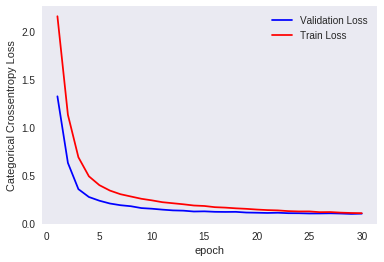

In [79]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


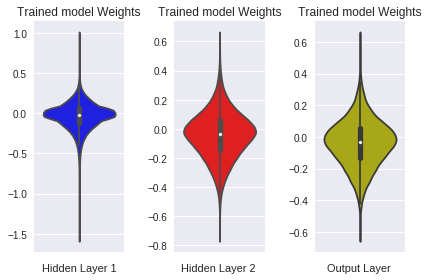

In [80]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

### MLP + Sigmoid + Adam + Batch Normalization + Dropout

In [81]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,),kernel_initializer = glorot_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(384, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(256, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(128, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(64, activation='sigmoid',kernel_initializer = glorot_uniform(seed=42)))
model_relu.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 384)               196992    
_________________________________________________________________
dropout_34 (Dropout)         (None, 384)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 256)               98560     
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 128)               32896     
__________

In [82]:
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 121us/step - loss: 2.1936 - acc: 0.1599 - val_loss: 1.5879 - val_acc: 0.3937
Epoch 2/30
60000/60000 [==============================] - 3s 56us/step - loss: 1.3109 - acc: 0.4512 - val_loss: 0.8529 - val_acc: 0.6901
Epoch 3/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.8666 - acc: 0.6805 - val_loss: 0.5724 - val_acc: 0.8010
Epoch 4/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.6562 - acc: 0.7887 - val_loss: 0.4209 - val_acc: 0.8977
Epoch 5/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.5151 - acc: 0.8647 - val_loss: 0.2906 - val_acc: 0.9321
Epoch 6/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.4113 - acc: 0.9042 - val_loss: 0.2318 - val_acc: 0.9439
Epoch 7/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.3514 - acc: 0.9213 - val_loss: 0.1964 - val_ac

### Dynamic plot showing the crossentropy loss for train and test set for each epoch

Test score: 0.093033562150551
Test accuracy: 0.9783


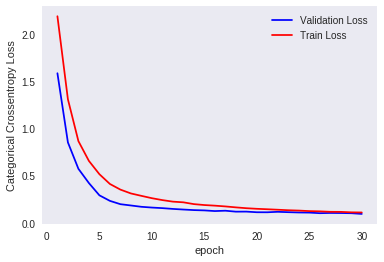

In [83]:
score = model_sigmoid.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Violin plots of the model weights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


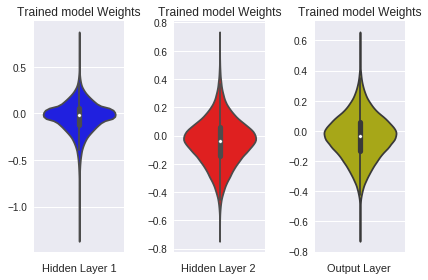

In [84]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

%matplotlib inline
fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
fig.tight_layout()
plt.show()

## Summary of the various MLP Architectures

### 512 (Input Layer) -> 128 (Hidden Layer 1) -> 10 (Output layer)

Activation | Optimizer | Batch Normalization | Dropout | Loss on Test set | Accuracy on Test set |
--- | --- | -- | -- | -- | -- |
Sigmoid | SGD | No | No | 0.45 | 87.86 |
Sigmoid  | Adam | No | No | 0.071| 98.07 |
Relu | SGD | No | No |0.144 | 95.84|
Relu | Adam | No | No |0.083 | 98.35|
Sigmoid | Adam | Yes | No | 0.088 | 97.87|
Sigmoid | Adam | Yes | Yes | 0.063 |98.18 |

### 512 (Input Layer) -> 256 (Hidden Layer 1) -> 128 (Hidden Layer 2) -> 10 (Output layer)

Activation | Optimizer | Batch Normalization | Dropout | Loss on Test set | Accuracy on Test set |
--- | --- | -- | -- | -- | -- |
Relu | Adam | No | No | 0.093  | 98.39 |
Relu  | Adadelta | No | No | 0.079| 98.38 |
Relu | Adam | Yes | No |0.088 | 97.87|
Sigmoid | Adadelta | Yes | No |0.065 | 98.51|
Relu | Adam | Yes | Yes | 0.059 | 98.45|
Tanh | Adam | Yes | Yes | 0.065 |98.34 |

### 512 (Input Layer) -> 384(Hidden Layer 1) -> 256 (Hidden Layer 2) -> 128 (Hidden Layer 3) -> 10 (Output layer)

Activation | Optimizer | Batch Normalization | Dropout | Loss on Test set | Accuracy on Test set |
--- | --- | -- | -- | -- | -- |
Relu | Adam | Yes | No | 0.084  | 98.04 |
Relu  | Adam | Yes | No | 0.059| 98.51 |
Sigmoid | Adam | No | Yes |0.072 | 98.19|
Sigmoid | Adam | Yes | Yes |0.072 | 97.99|


### 512 (Input Layer) -> 384(Hidden Layer 1) -> 256 (Hidden Layer 2) -> 128 (Hidden Layer 3) -> 64 (Hidden Layer 4) -> 10 (Output layer)

Activation | Optimizer | Batch Normalization | Dropout | Loss on Test set | Accuracy on Test set |
--- | --- | -- | -- | -- | -- |
Relu | Adam | Yes | No | 0.082  | 98.13 |
Relu  | Adam | Yes | No | 0.069| 98.38 |
Sigmoid | Adam | No | Yes |0.098 | 97.87|
Sigmoid | Adam | Yes | Yes |0.093 | 97.83|

## Observations

* It can be seen that the addition of an extra hidden layer reduces the loss on test set and also improves the accuracy slightly. 
* Also it can be seen that the Relu + Adam + Batch Norm cross entropy loss on test set is slightly lower than the Relu + Adam + Without Batch Norm. 
* This can be attributed to Regularization aspect of Batch normalization with the regularizer preventing the model from getting overfitted. 
* It can be seen that the Sigmoid + Adadelta model is overfitted as there is a huge difference between the train loss and test loss. 
* It can also be observed that Relu and Tanh activations along with Adam+ Batch Norm + Dropout provided good results on both train set as well as test set.
* Since it is a small dataset, there is not a considerable improvement in the accuracy or crossentropy loss due to the addition of extra hidden layers.